In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Visualization of node data

In [2]:
def plot_data_nodes(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), 3, figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        data = pd.read_csv('data/{}/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,0].boxplot([data.loc[data.resistance == k, 'metric'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,0].set_xlabel('resistance (t)', fontsize=12)
        axs[i,1].set_title('Max levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,1].boxplot([data.loc[data.resistance == k, 'max_level'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,1].set_xlabel('resistance (t)', fontsize=12)
        axs[i,2].set_title('Avg levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,2].boxplot([data.loc[data.resistance == k, 'avg_level'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,2].set_xlabel('resistance (t)', fontsize=12)
        # delete from memory
        del data

    #plt.suptitle('Data visualization for n = {}, {}'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/stats_per_node_{}_{}_{}.jpeg'.format(thr, lab, n))

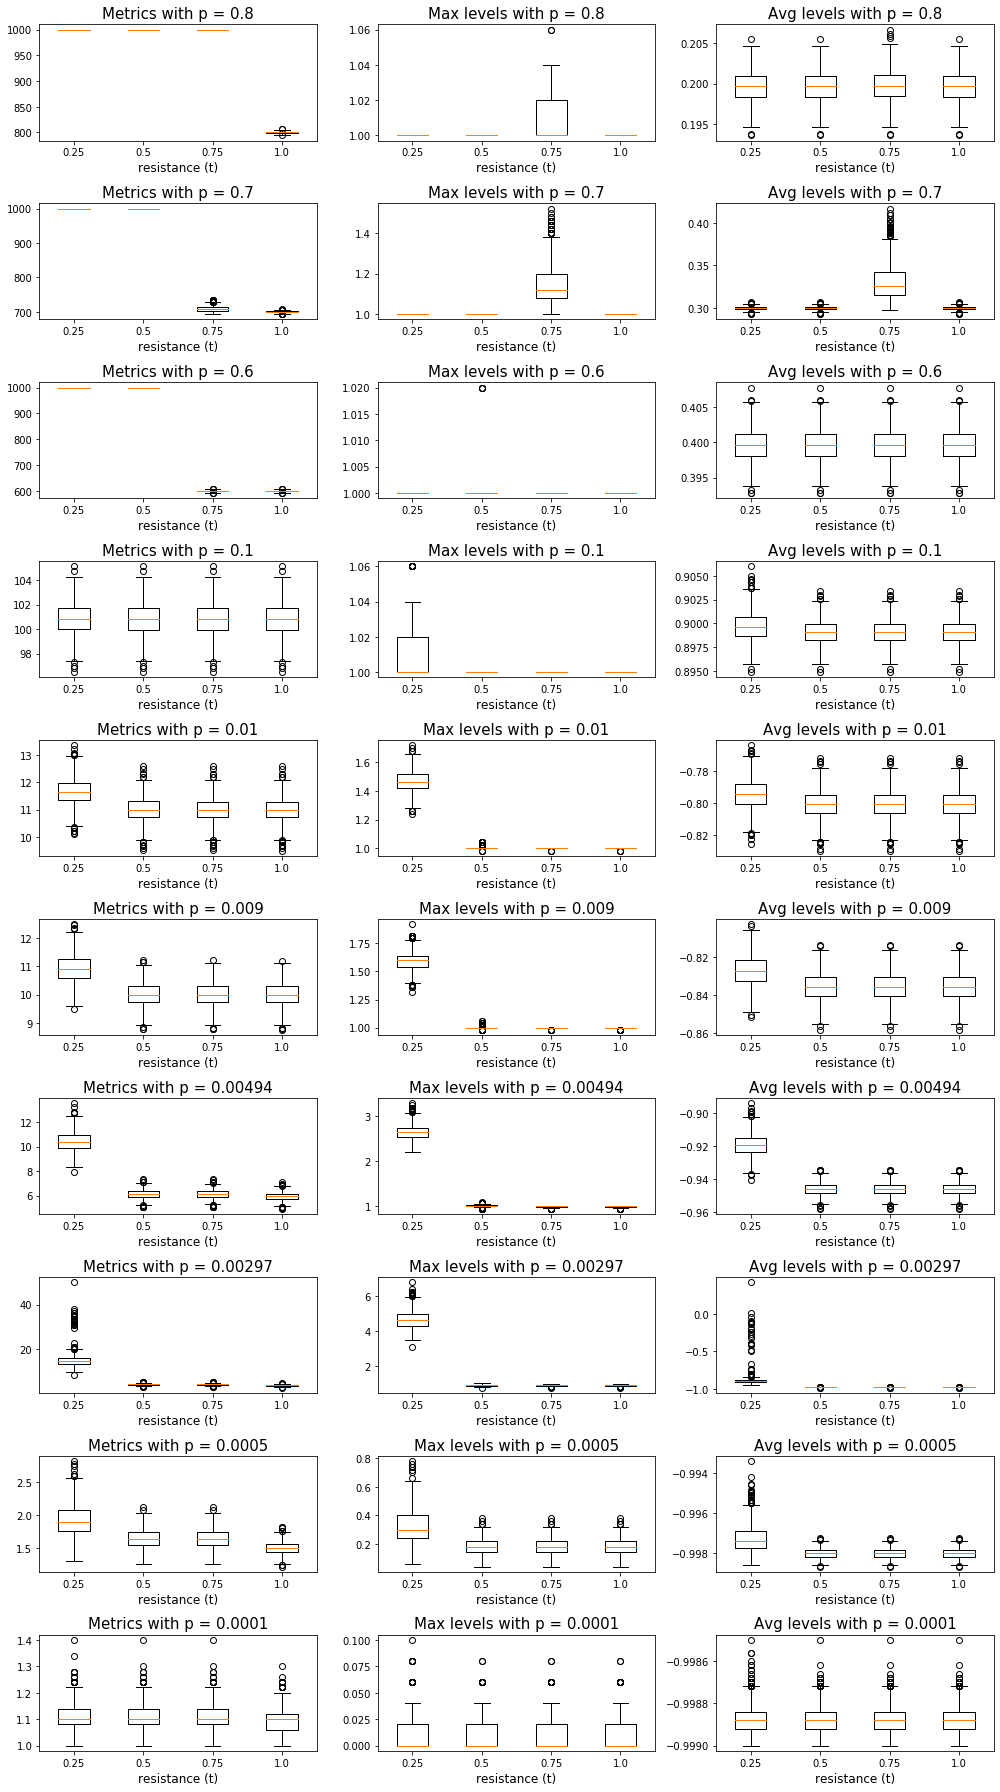

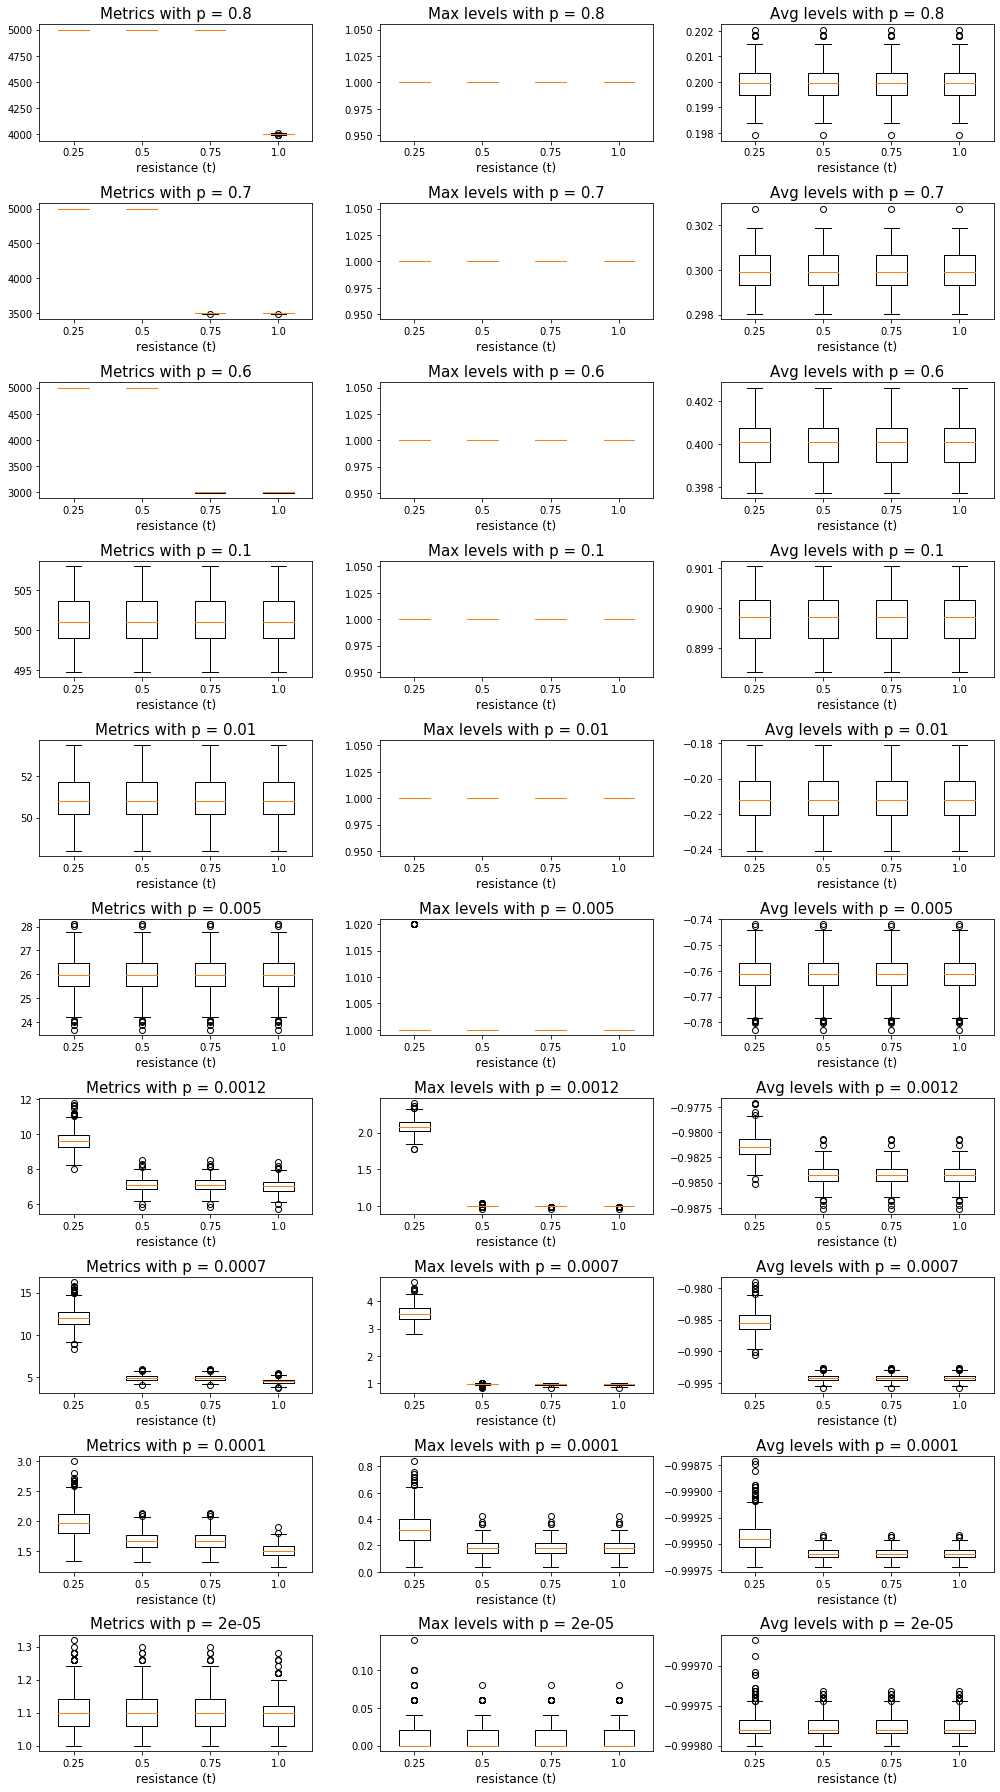

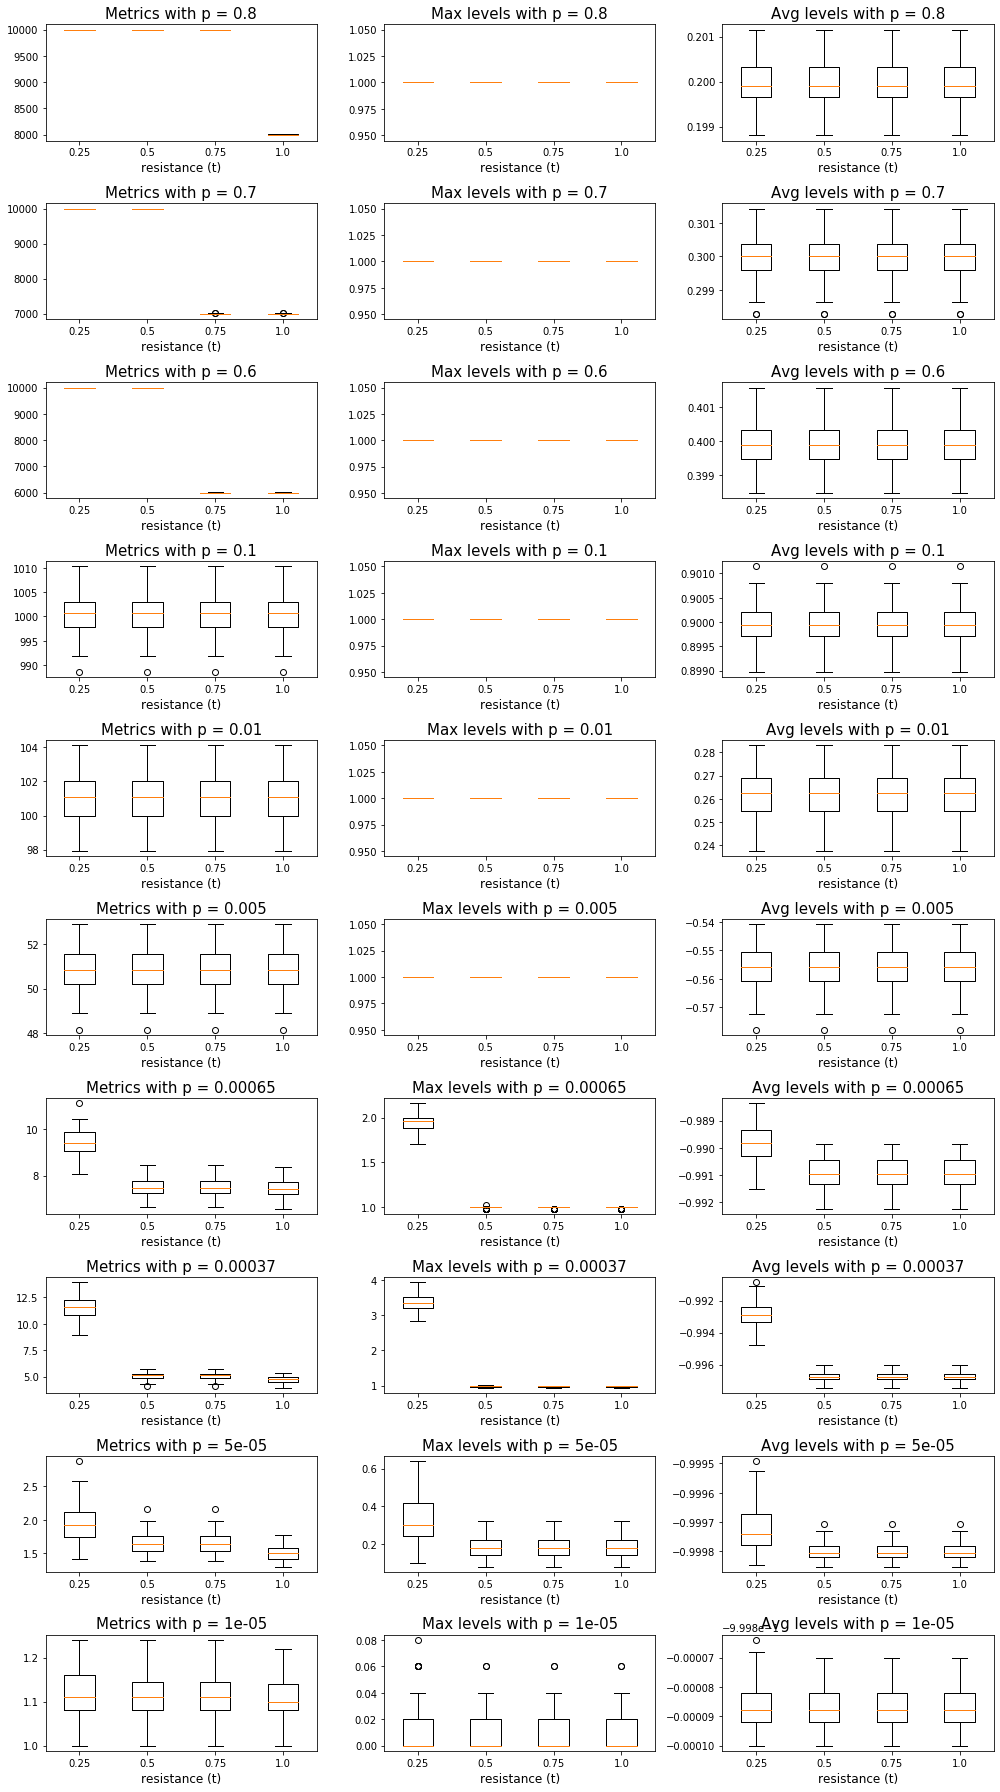

In [11]:
N = 10000
d = False
t = False

# reading resistances
res = np.load('data/res_phase1.npy')

for N in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    plot_data_nodes(prob, d, N, res, t)

## Visualization of graph data

In [183]:
def plot_data_graphs(prob, directed, n, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else: lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else: thr = 'pred'

    fig, axs = plt.subplots(len(prob), 3, figsize = (14,10))
    for i, p in enumerate(prob):
        # load data
        raw_data1 = pd.read_csv('data/{}/ref_high_phase2/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
        raw_data2 = pd.read_csv('data/{}/ref_high_phase3/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
        raw_data = pd.concat([raw_data1, raw_data2]).sort_index()
        del raw_data1, raw_data2
        data1 = pd.read_csv('data/{}/ref_high_phase2/data_graph_{}_{}_{}.csv'.format(thr, lab, n, p)).set_index('resistance')
        data2 = pd.read_csv('data/{}/ref_high_phase3/data_graph_{}_{}_{}.csv'.format(thr, lab, n, p)).set_index('resistance')
        data = pd.concat([data1, data2]).sort_index()
        del data1, data2
        data_min = raw_data.groupby('resistance').min()[['metric', 'max_level', 'avg_level']]
        data_max = raw_data.groupby('resistance').max()[['metric', 'max_level', 'avg_level']]
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(p,4)), fontsize=15)
        data['metric'].transpose().plot(kind='line',ax=axs[i,0], color='m')
        axs[i,0].fill_between(data_min.index, data_min['metric'].values, data_max['metric'].values, alpha='0.2')
        
        axs[i,1].set_title('Max levels with p = {}'.format(round(p,4)), fontsize=15)
        data['max_level'].transpose().plot(kind='line',ax=axs[i,1], color='m')
        axs[i,1].fill_between(data_min.index, data_min['max_level'].values, data_max['max_level'].values, alpha='0.2')
        
        axs[i,2].set_title('Avg levels with p = {}'.format(round(p,4)), fontsize=15)
        data['avg_level'].transpose().plot(kind='line',ax=axs[i,2], color='m')
        axs[i,2].fill_between(data_min.index, data_min['avg_level'].values, data_max['avg_level'].values, alpha='0.2')
        
        # delete from memory
        del data, data_min, data_max

    #plt.suptitle('Data visualization for n = {}, {}'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/stats_per_gnp_refhigh_{}_{}_{}.jpeg'.format(thr, lab, n), bbox_inches='tight')

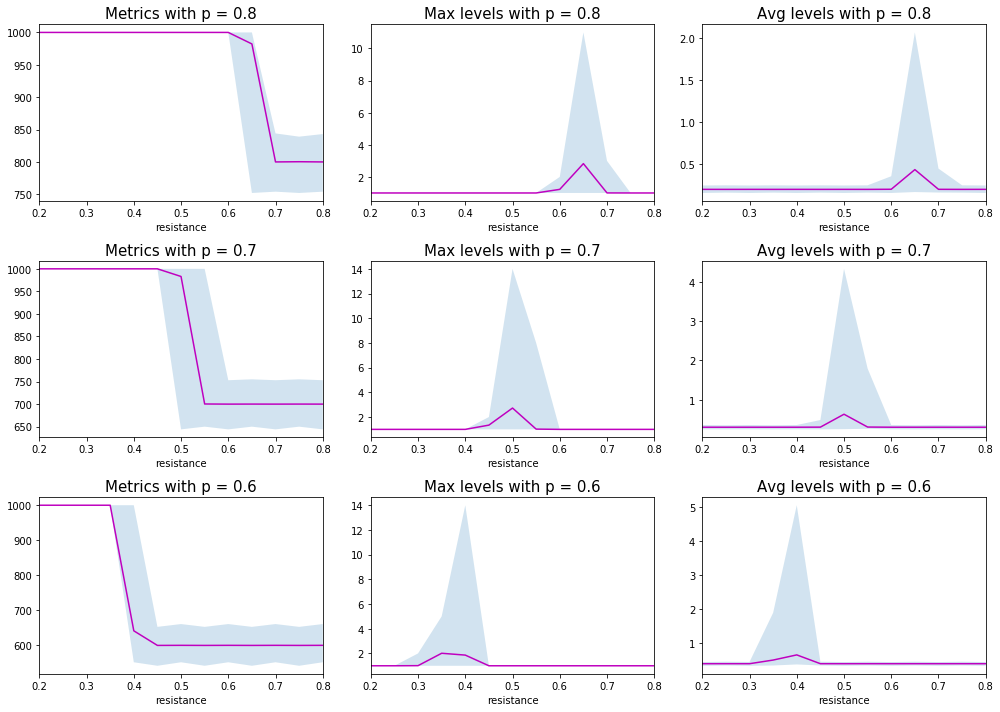

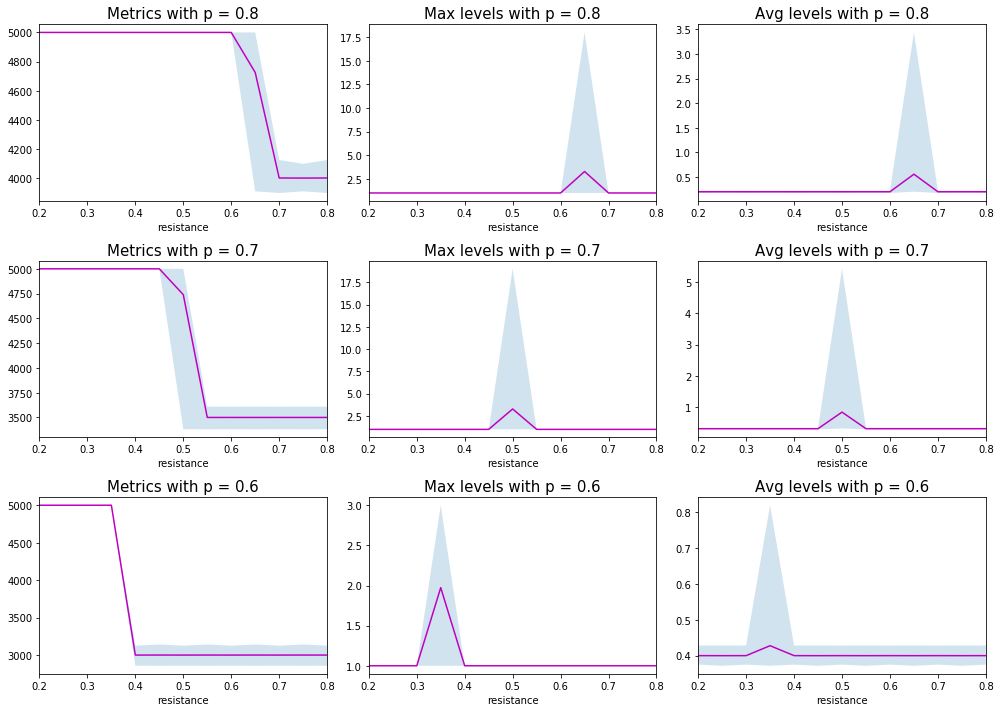

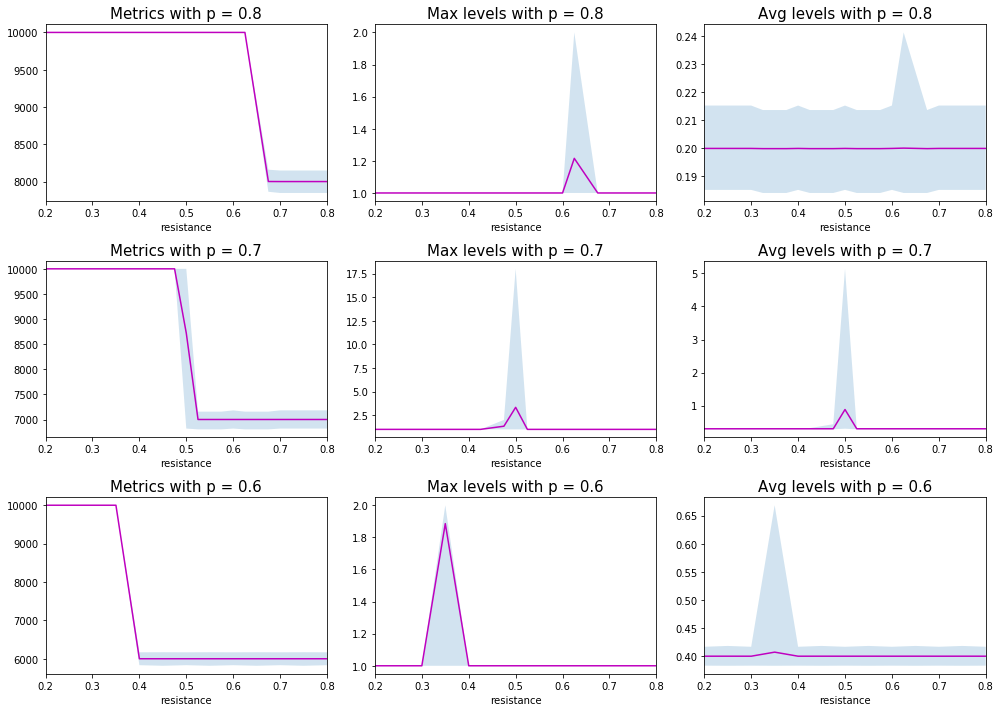

In [184]:
d = True
t = True

# reading resistances
# res = np.catenate(( np.load('data/res_phase2.npy'), np.load('data/res_phase3.npy') )) 


for n in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        prob = eval(f.read())
    plot_data_graphs([0.8, 0.7, 0.6], d, n, t)

## Metric visualization

In [86]:
def plot_metric_counts(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), len(res), figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        temp = pd.read_csv('data/{}/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        for j, group in enumerate(temp[['metric','resistance']].groupby('resistance')):
            metrics, counts = np.unique(group[1].metric.values, return_counts=True)
            # plot data
            if metrics.shape[0] != 1:
                sym = '-'
            else:
                sym = 'x'
            axs[i,j].set_title('p = {}, t = {}'.format(round(p,6),group[0]), fontsize=15)
            _ = axs[i,j].plot(metrics, counts, sym, color='coral')
            _ = axs[i,j].set_xlabel('metrics')
            _ = axs[i,j].set_ylabel('counts')
        
        # delete from memory
        del temp

    plt.suptitle('Metric counts, n={}, {} case'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/comulative_metric_{}_{}_{}.jpeg'.format(thr, lab, n))

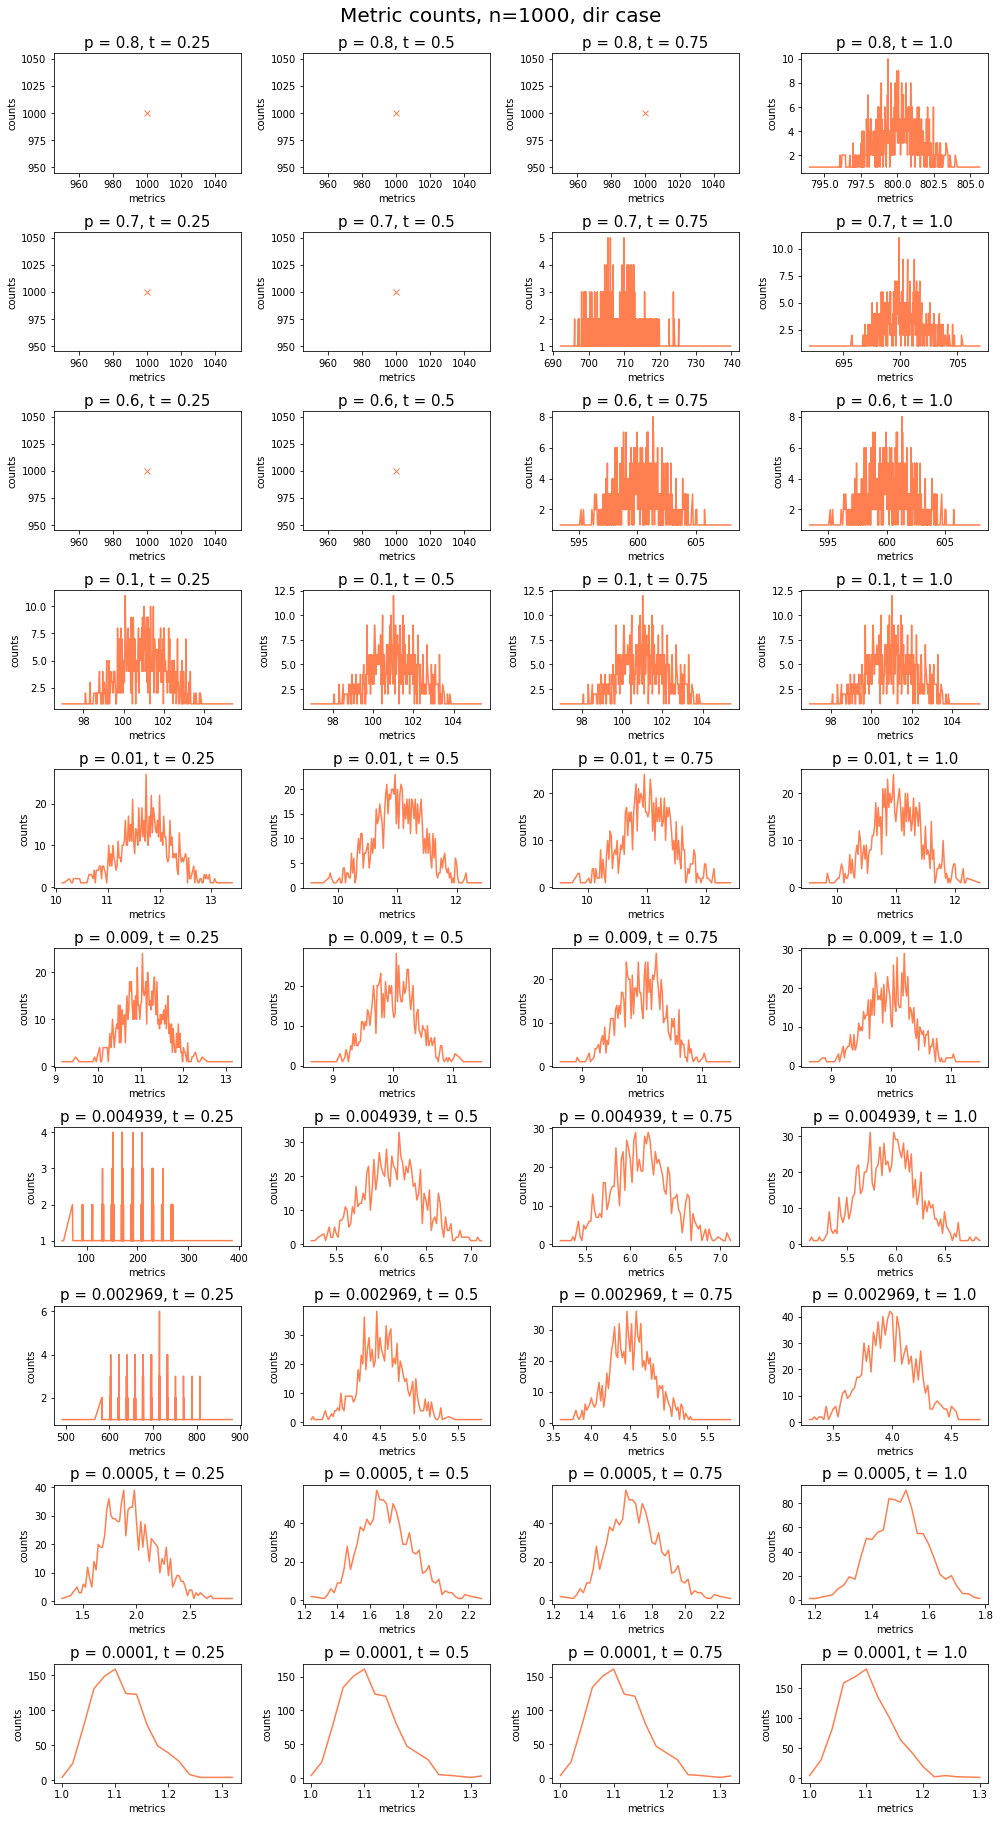

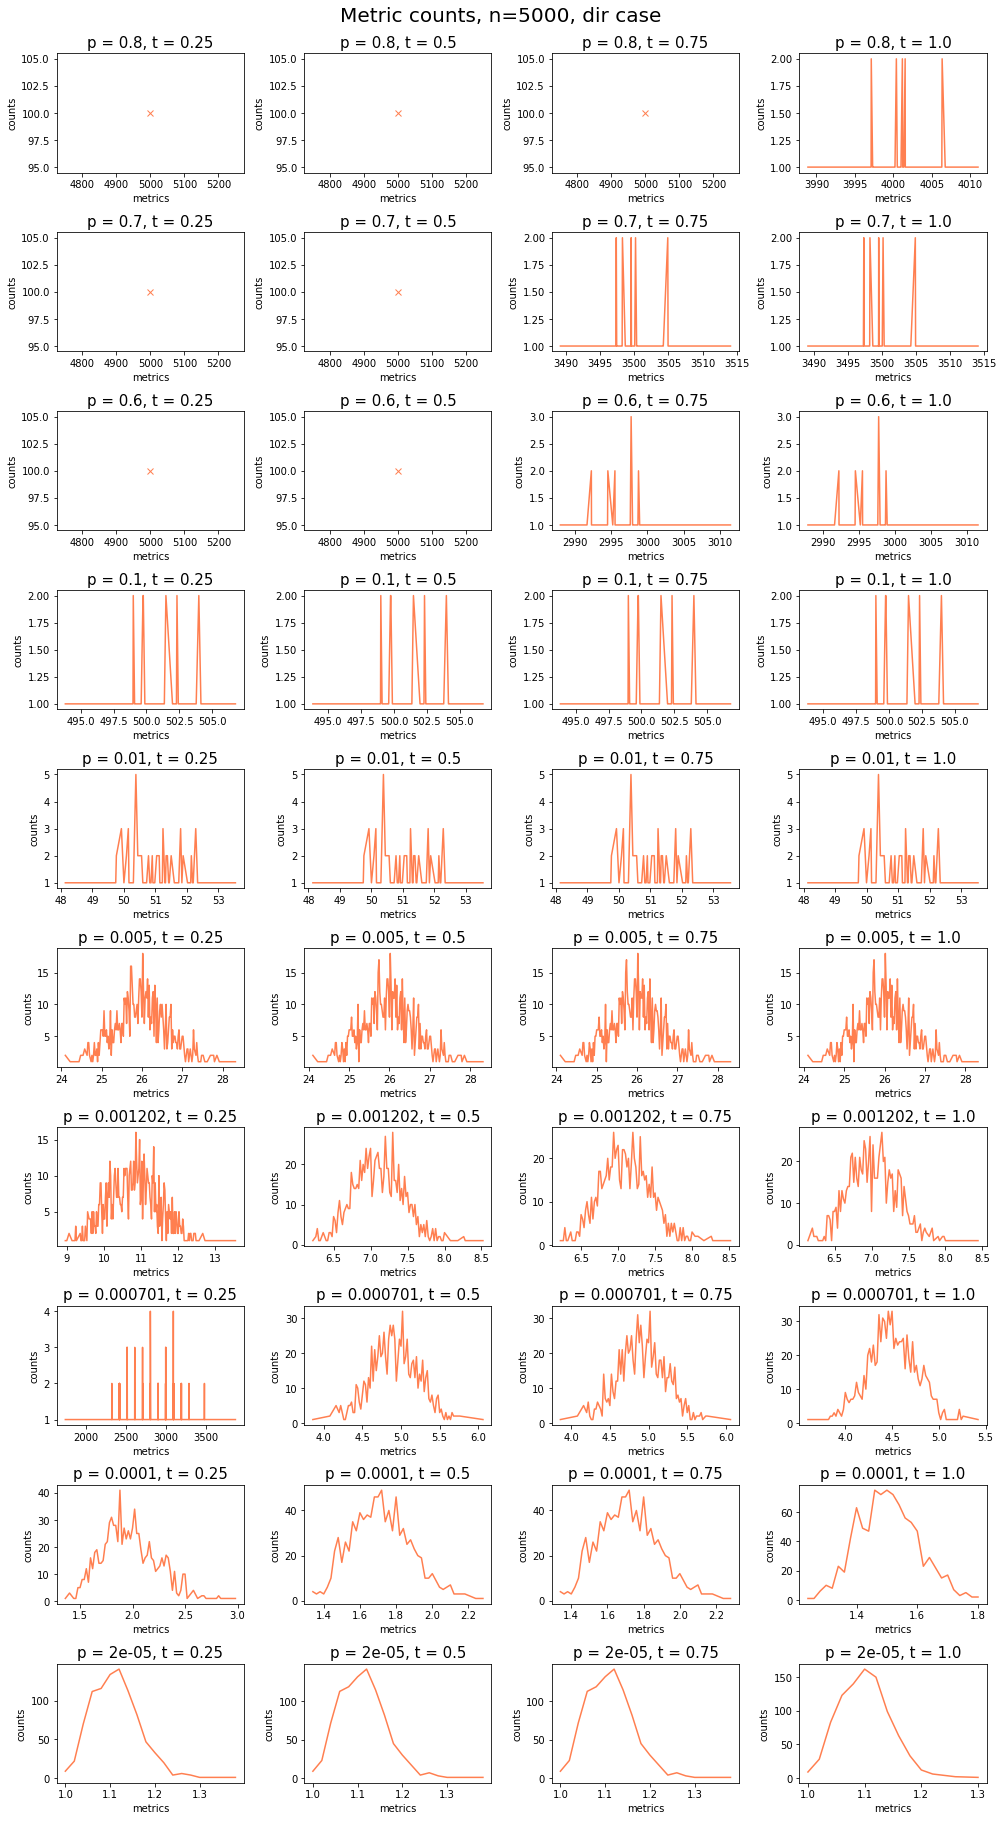

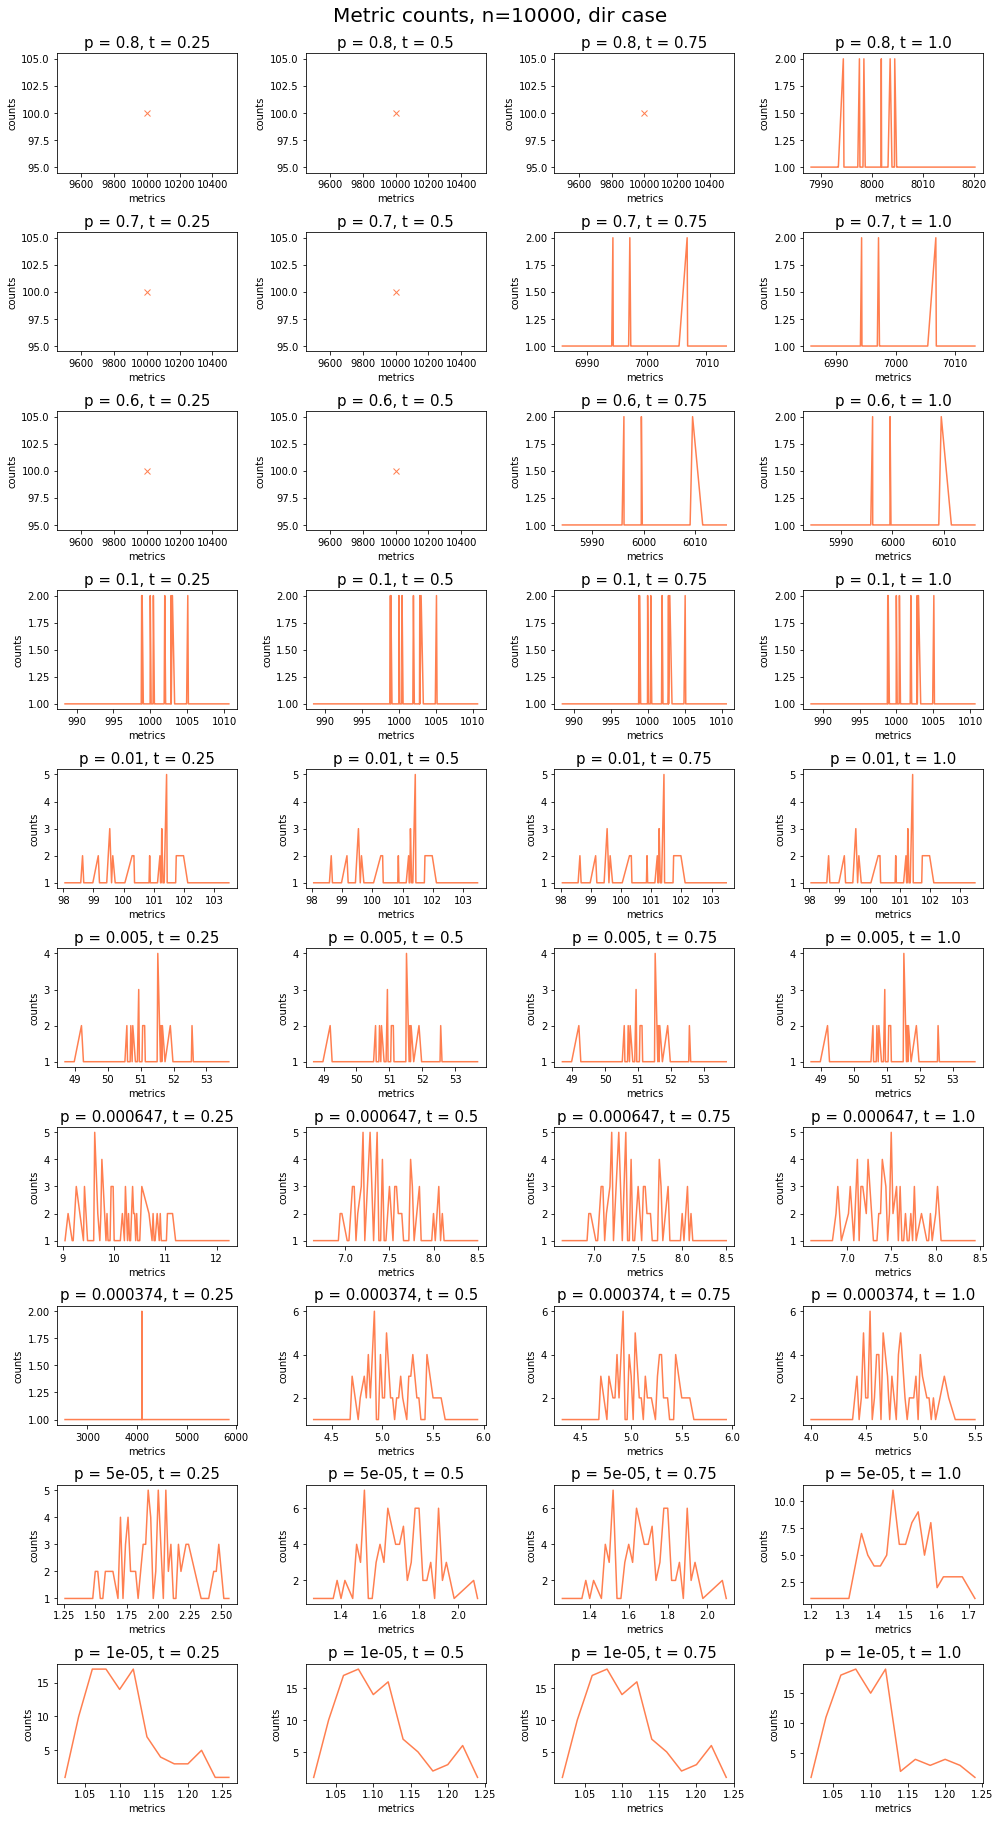

In [87]:
d = True
t = False

# reading resistances
res = np.load('data/res_phase1.npy')

for N in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(N), 'r') as f:
        prob = eval(f.read())
    plot_metric_counts(prob, d, N, res, t)

## Inflection point visualization

In [243]:
def plot_inflection(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), 5, figsize = (15,10))
    for i, p in enumerate(prob):
        # load data
        data1 = pd.read_csv('data/{}/ref_high_phase2/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        data2 = pd.read_csv('data/{}/ref_high_phase3/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        data = pd.concat([data1, data2], ignore_index=True)
        del data1, data2
        j = 0
        for group in data[['metric','max_level','resistance']].groupby('resistance'):
            if group[0] in res_per_p[p]:
                axs[i,j].set_title('p = {}, t = {}'.format(round(p,6),group[0]), fontsize=15)
                _ = axs[i,j].plot(group[1].metric.values, group[1].max_level.values, 'o', color='lightsteelblue', alpha= 0.7)
                _ = axs[i,j].set_xlabel('metric')
                _ = axs[i,j].set_ylabel('max level')
                j+=1

        # delete from memory
        del data

    #plt.suptitle('Metric VS Max Level'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/inflection_point_{}_{}_{}.jpeg'.format(thr, lab, n), bbox_inches='tight')

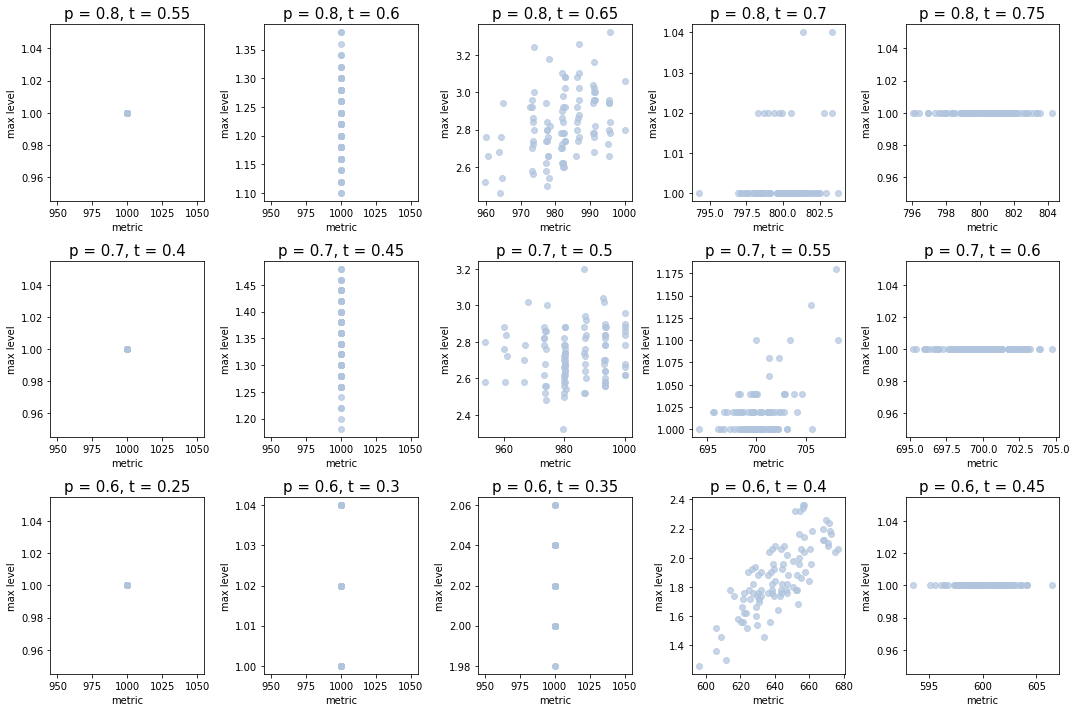

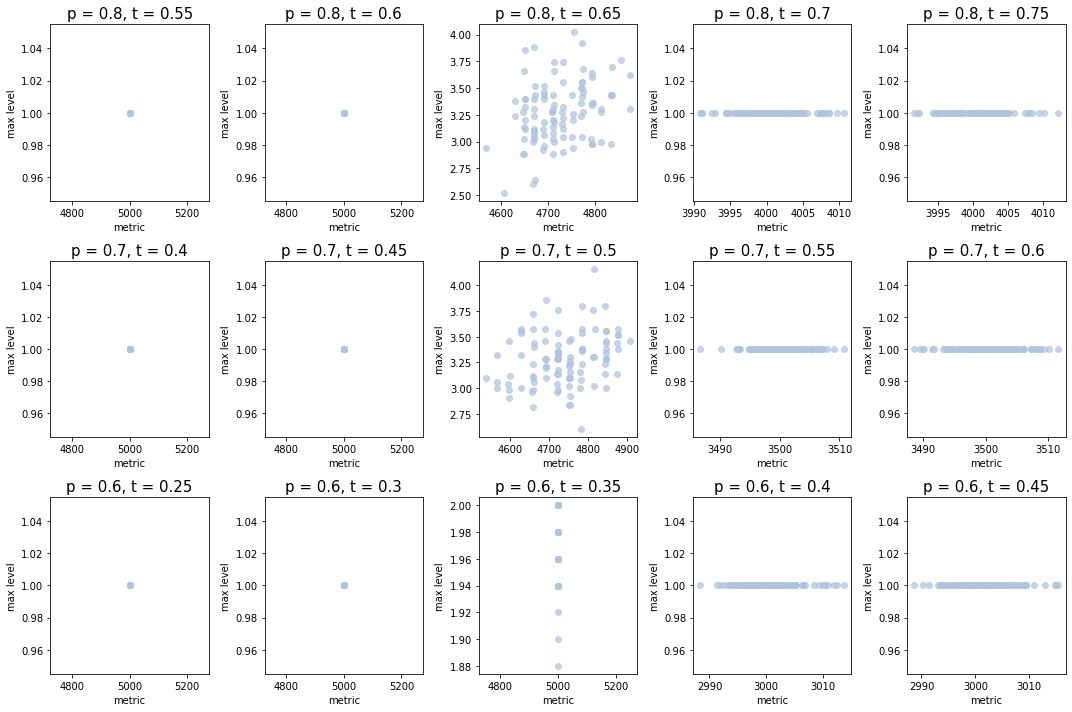

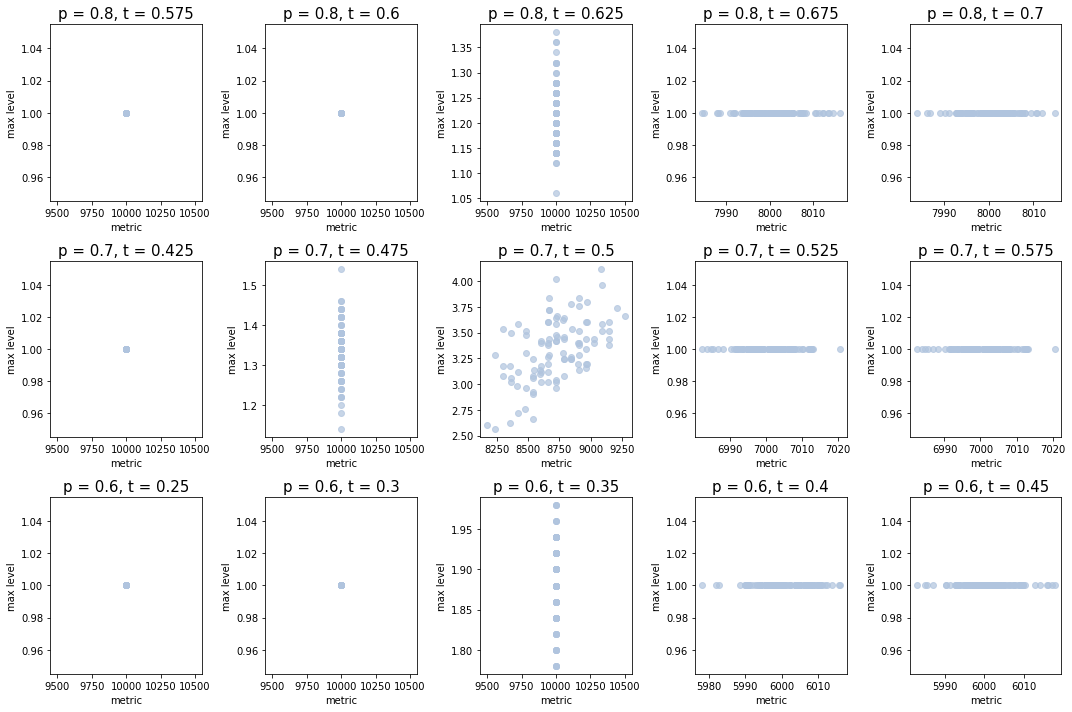

In [244]:
d = True
t = True

# reading resistances
res = np.concatenate(( np.load('data/res_phase2.npy'), np.load('data/res_phase3.npy') ))
res_per_p = {0.8: res[(res >= 0.55) & (res <= 0.75)],
             0.7: res[(res >= 0.4) & (res <= 0.6)],
             0.6: res[(res >= 0.25) & (res <= 0.45)]
            }
# define high probs
prob = [0.8, 0.7, 0.6]

for n in [1000, 5000, 10000]:
    res = np.concatenate(( np.load('data/res_phase2.npy'), np.load('data/res_phase3.npy') ))
    if n == 10000:
        res = np.concatenate( ( np.load('data/res_phase4.npy'), res) )
        res_per_p = {0.8: res[(res >= 0.55) & (res <= 0.75)],
                     0.7: res[(res >= 0.425) & (res <= 0.575)],
                     0.6: res[(res >= 0.25) & (res <= 0.45)]
                    }
    plot_inflection(prob, d, n, res_per_p, t)

In [237]:
data1 = pd.read_csv('data/maxpred/ref_high_phase2/data_node_dir_10000_0.7.csv')
data2 = pd.read_csv('data/maxpred/ref_high_phase3/data_node_dir_10000_0.7.csv')
data = pd.concat([data1, data2], ignore_index=True)
data.head()

,resistance,node,metric,max_level,avg_level
0,0.2,94,10000.0,1.0,0.299626
1,0.2,130,10000.0,1.0,0.299612
2,0.2,143,10000.0,1.0,0.299700
3,0.2,174,10000.0,1.0,0.299794
4,0.2,195,10000.0,1.0,0.300302


In [238]:
data.resistance.unique()

array([0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  , 0.325, 0.375,
       0.425, 0.475, 0.525, 0.575, 0.625, 0.675])

In [240]:
data.resistance[(data.resistance >= 0.425) & (data.resistance <= 0.575)].unique()

array([0.5  , 0.425, 0.475, 0.525, 0.575])